# Calculation of Diffusion Coefficients from Cyclic Volammetry Electrodeposition Peak on Foreign Substrate using a Digital Staircase

### Before using this computation tool ensure that you meet the following conditions:
1. Electrochemical reversibility (i.e., peak current ($I_p$) is linear with sqaure root of scan rate ($\nu$), peak potential ($E_p$) independent of $\nu$)								
2. Semi-infinite linear diffusion (i.e., $\nu << \frac {RTD_{Ox}}{nFr_0}$)								
3. Metal deposits onto a clean foreign substrate (e.g., La deposition onto W)								
4. A digital staircase is used to approximate a true analogy linear scan ($\Delta E = 0$ for analog scan)

### Nomenclature
|        |                                       |          |                             |
|:-------|:--------------------------------------|:---------|:----------------------------|
|$A$     |Area of working electrode              |$n$       |Number of electrons exchanged             |
|$C_{Ox}$|Concentration of counter ion of deposit|$R$       |Universal Gas Constant                    |
|$D_{Ox}$|Diffusion coefficient                  |$r_A$     |Radius of deposited atoms or molecules    |
|$e$     |Roughness factor for electrode/deposits|$T$       |Temperature of electrolyte                |
|$F$     |Faraday's constant                     |$\Delta E$|Potential step (scan rate × sampling time)|
|$I_p$   |Peak current                           |$\nu$     |Scan rate                                 |
|$MW$    |Molecular or atomic mass of deposit    |$\rho_D$  |Mass density of deposit                   |

### Equations
|Monolayer of Deposit Calculation|Calculated Peak Current|
|:-----:|:---:|
|$$\Gamma_1 = e\frac{\rho_D\left(2r_A\right)}{MW}$$|$$I_p=-\frac{0.611AC_{Ox}^*}{\left(1 +0.588\sqrt{\Delta\epsilon_s}\right)\left(1 + 0.16\chi\right)}\sqrt{D_{Ox}\nu\frac{n^3F^3}{RT}}$$|

### Dimensionless Paramenters
|    |    |    |
|:--:|:--:|:--:|
|$$\Delta\epsilon_s=\frac{nF}{RT}\mid\Delta E\mid$$||$$\chi=\frac{C_{Ox}^*}{\Gamma_1}\sqrt{\frac{D_{Ox}RT}{nF\nu}}$$|

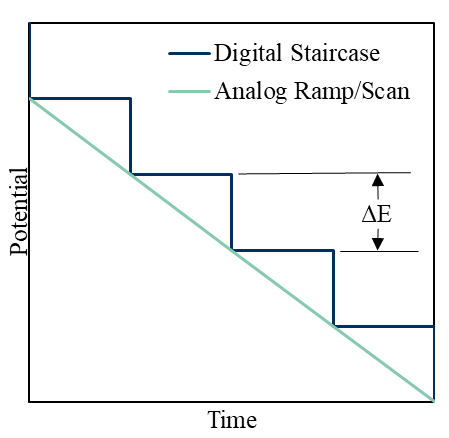

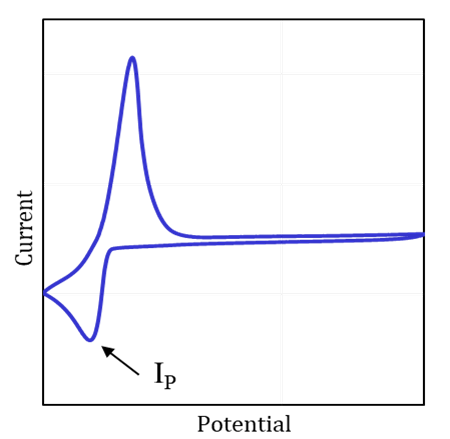

***Note:** This figure is an example. Consult your specific potentiostat software to ensure parameters are defined in the same manner. You may need to convert your potentiostat parameters to match the definitions in this figure.*

<font color='red'>Please cite the following sources when using this computational tool.</font>
1. Krulic, D.; Fatouros, N.; Liu, D. A Complementary Survey of Staircase Voltammetry with Metal Ion Deposition on Macroelectrodes. J. Electroanal. Chem. 2015, 754, 30–39. https://doi.org/10.1016/j.jelechem.2015.06.012.
2. Rappleye, D. S.; Fuller, R. G. Bringing the Analysis of Electrodeposition Signals in Voltammetry Out of the Shadows. J. Electrochem. Soc. 2023, 170 (6), 063505. https://doi.org/10.1149/1945-7111/acd879.

# Imports

In [29]:
import numpy as np
from scipy.optimize import fsolve

# Inputs

In [62]:
A      = 0.593 #cm^2
COx    = 2.36E-5 #mol cm^-3
e      = 1.5
F      = 96485 #C eq^-1
MW     = 238.03 #g mol^-1
n      = 3 #eq mol-1
R      = 8.314 #J mol^-1 K^-1
rA     = 175 #pm
T      = 773 #K
DeltaE = 0.0024 #V
rhoD   = 18.9 #g cm^-3

#these arrays accept as many data points as provided
nu     = np.array([0.1]) #V s^-1
IpMeas = np.array([-0.05642]) #A

# Calculations

In [63]:
Gamma1   = e * (rhoD*2*rA*1E-10)/MW
Deltaeps = n*F/R/T * abs(DeltaE)

#solver
def solver(DOx):
    chi = COx/Gamma1 * np.sqrt(DOx*R*T/n/F/nu)
    IpCalc = -0.611*A*COx*np.sqrt(DOx*nu/R/T*(n*F)**3)\
             /(1 + 0.588*np.sqrt(Deltaeps))/(1 + 0.16/chi)
    SSE = np.sum((IpCalc - IpMeas)**2)
    return SSE

solverOutput = fsolve(solver, 1E-5, full_output=True) 
DOx = solverOutput[0][0] #cm^2 s^-1
SSE = solverOutput[1]['fvec']


#report parameters
print(f'Γ1:  {Gamma1:.3E}')
print(f'Δϵs: {Deltaeps:.3E}')
print(f'SSE: {SSE:.3E} A^2\n')
print(f'-- Calculated Diffusion Coefficient --')
print(f'DOx: {DOx:.3E} cm^2 s^-1')

Γ1:  4.169E-09
Δϵs: 1.081E-01
SSE: 2.123E-32 A^2

-- Calculated Diffusion Coefficient --
DOx: 1.658E-04 cm^2 s^-1
